## Numpy 

In [1]:
import numpy as np

X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1,],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [2]:
counts = {}

for label in np.unique(y):
    counts[label] = X[y == label].sum(axis = 0)
print("Feature counts: \n{}".format(counts))

Feature counts: 
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## Decision Trees

In [3]:
import mglearn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(tree.score(X_train,y_train)))
print("Testing set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Training set accuracy: 1.000
Testing set accuracy: 0.937


### PrePrunning the Tree

In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(tree.score(X_train,y_train)))
print("Testing set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Training set accuracy: 0.988
Testing set accuracy: 0.951


In [6]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], 
               feature_names = cancer.feature_names, impurity=False, filled=True)

In [7]:
# import graphviz

# with open("tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

### Feature Importance

In [8]:
print("Feature iportances: \n{}".format(tree.feature_importances_))

Feature iportances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


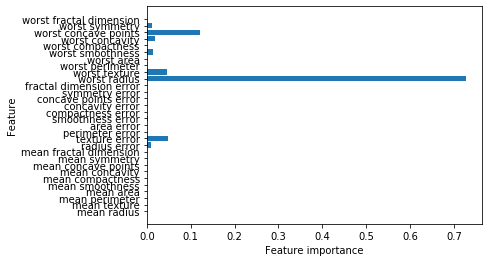

In [9]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


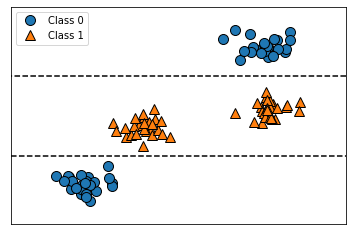

In [10]:
tree = mglearn.plots.plot_tree_not_monotone()

## Random Forest Regressor

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise=0.25, random_state = 3)
X_train, X_test, y_train,  y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

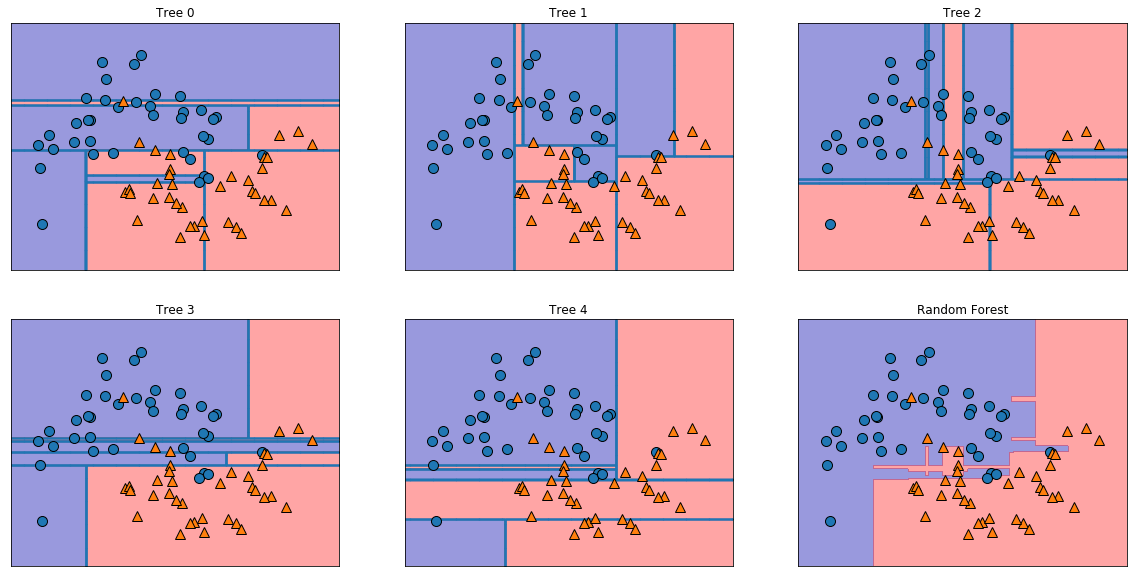

In [10]:
import mglearn
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)